## Setup Environment
### import libraries & dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data_df = pd.read_csv('melbourne delivery.csv')

## Exploratory Data Analysis

<img src="crips_dm.png">

EDA ada pada step data understanding di bagan CRIPS DM di atas. Dengan melakukan EDA, berikut manfaat yang diperoleh:
- kita dapat memahami permasalahan yang ada pada data kita, sehingga dapat merencanakan langkah-langkah data cleansing (pada step data preparation)
- kita juga dapat merumuskan pertanyaan-pertanyaan bisnis lain, sehingga dapat mempertajam pertanyaan bisnis yang merupakan hasil dari step data understanding
- kita juga sudah dapat menghasilkan output berupa hasil analisis deskriptif yang dapat disajikan pada visualisasi data dan dashboard. Output ini kadang terasa cukup sebagai bahan pertimbangan pengambilan keputusan. 

### Recipe:
#### Univariate:
- Cek dimensi data (tabel-tabel)
- Cek tipe data dari masing-masing kolom
- Tampilkan sebagian value dari masing-masing kolom
- Lakukan perhitungan descriptive statistics untuk tiap kolom
- Lakukan analisis visual dengan memplot tiap variable
- Cek missing value

...

#### Multivariate:
...

## Univariate EDA
#### Cek dimensi data

In [26]:
data_df.shape

(1000, 12)

Datanya memiliki 500 baris dan 12 kolom. Dengan melihat dimensi data secara sekilas, kita bisa menyimpulkan apakah kita memiliki data yang cukup untuk melakukan permodelan machine learning dengan membandingan antara jumlah kolom dengan jumlah baris.

### Cek n baris teratas / terakhir

In [27]:
data_df.head(5)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB01647,19/11/2018,18:38:52,Dinner,NaN,"[('Salmon', 3), ('Shrimp', 9), ('Fish&Chips', ...",891.5,-37.823797,144.990237,0,9.493,13.458343
1,ORDY04071,28/03/2018,10:52:23,Breakfast,TP,"[('Eggs', 5), ('Pancake', 10), ('Coffee', 3)]",375.0,-37.813087,144.963482,0,8.166,10.606658
2,ORDZ03354,4/08/2018,15:05:54,Lunch,NS,"[('Burger', 6), ('Chicken', 7)]",410.0,-37.803469,144.949764,0,8.333,15.992157
3,ORDI00927,18/01/2018,8:30:25,Breakfast,NS,"[('Steak', 6), ('Coffee', 1), ('Eggs', 7), ('P...",433.0,-37.822928,144.937166,1,10.641,7.577970
4,ORDY08485,2/06/2018,13:04:13,Breakfast,TP,"[('Salad', 6), ('Fries', 1), ('Chicken', 5), (...",641.2,-37.816296,144.967445,0,7.904,13.006944


In [28]:
data_df.tail(5)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
995,ORDA10012,18/05/2018,12:33:48,Lunch,BK,"[('Chicken', 8), ('Burger', 8), ('Fries', 10)]",624.00,-37.814807,144.957624,0,8.253,14.444586
996,ORDZ02231,23/02/2018,9:41:24,Breakfast,NS,"[('Pancake', 9), ('Eggs', 1), ('Cereal', 7), (...",417.25,-37.800891,144.928206,0,10.102,15.342084
997,ORDJ01070,31/07/2018,14:55:46,Lunch,NaN,"[('Burger', 1), ('Steak', 7)]",346.00,-37.802758,145.002457,0,NaN,14.693429
998,ORDB05270,2/10/2018,17:07:36,Dinner,TP,"[('Shrimp', 4), ('Pasta', 3), ('Salmon', 5)]",503.50,-37.823362,144.941746,0,9.360,13.644242
999,ORDC06001,26/12/2018,19:49:51,Dinner,NS,"[('Salmon', 4), ('Shrimp', 7), ('Fish&Chips', ...",932.00,-37.804271,145.011161,0,10.127,15.974725


dengan membandingkan sample values yang ditampilkan dan tipe data tiap kolom, kita dapat mendefinisikan jenis data masing-masing kolom dan menemukan masalah jenis data yang ada. Jenis data biasanya dikelompokan sebagai berikut:
- Kuantitatif, bisa dibagi lagi menjadi:
  - Continuous/ratio (how much): nilai bisa berada di antara dua angka bulat (non-finite value)
  - Discrete/count (how many): nilai perhitungan dari tiap objek secara individual
- Kategorikal, bisa dibagi lagi menjadi:
  - Binary : hanya ada dua kategori (yes/no, 0/1)
  - Nominal : kelompok/kategory yang tidak memiliki ranking/urutan
  - Ordinal : kelompok/kategory yang dapat diurutkan sesuai ranking
- tipe lain seperti tanggal dan waktu
  
jenis data yang berbeda memerlukan proses data processing yang berbeda pula.
misal:
- data kategorikal yang belum berupa angka harus diubah menjadi angka dengan proses labeling (one hot atau label encoding)
- data kuantitatif, dapat memerlukan proses cleansing outlier dan data transformation (normalize)

### Cek type data tiap kolom

In [21]:
data_df.dtypes

order_id                    object
date                        object
time                        object
order_type                  object
branch_code                 object
order_items                 object
order_price                float64
customer_lat               float64
customer_lon               float64
customerHasloyalty?          int64
distance_to_customer_KM    float64
delivery_fee               float64
dtype: object

Kesimpulan sementara:
- order_id

data nominal, ID dari order tersebut dengan format (ORD + kode + angka), code ditengah mungkin berhubungan dengan kolom lain
- date

data tanggal order, jika dilihat sekilas ada masalah di urutan bulan dan hari
- time

data waktu order, menggunakan format 24H, memiliki 3 angka yang kemungkinan jam:menit:detik
- order_tipe

data ordinal/nominal, kelompok waktu makan (breakfast, lunch, dinner). Harusnya berhubungan dengan kolom time
- branch_code

kode dari cabang restaurant, terdapat missing data
- order_items

menu yang di pilih, memiliki data berupa kumpulan data yang didalamnya ada menu dan angka pesanan. harus ada preprocessing untuk mengubah bentuk data dalam kolom ini.
- order_price

data discrete, berupa jumlah harga dari barang yang dipesan, harusnya berhubungan dengan order_items
- customer_lat

data spatial, koordinat latitude dari pelanggan. menarik jika divisualisasikan dalam sebuah map
- customer_lon

data spatial, koordinat longitude dari pelanggan. menarik jika divisualisasikan dalam sebuah map
- customer_hasLoyalty

terlihat memiliki value 0 semua. sepertinya data binary, 0 atau 1... tipe data numeric, harusnya kategorical
- distance_to_cust

data continuous, jarak antara restoran dan pelanggan dalam KM, terlihat data outlier
- delivery_fee

data continuous, harga yang harus dibayar oleh pelanggan, harusnya berhubungan dengan distance (bisa juga merupakan target dari model prediktif (kasus regresi))

## Cek Descriptive Statistic

Code di bawah menampilkan statistik untuk numerical variable

In [30]:
data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,1000.000000,1000.000000,1000.000000,1000.000000,950.000000,950.000000
mean,501.532500,-34.283183,144.234119,0.077000,8.708305,13.864489
std,270.762043,18.251347,11.542847,0.266725,2.138843,2.764187
min,28.500000,-38.110916,-37.820866,0.000000,3.479000,4.272860
25%,294.012500,-37.817748,144.951225,0.000000,7.746750,12.608034
50%,454.750000,-37.812055,144.963213,0.000000,8.751000,13.878203
75%,659.625000,-37.805428,144.978749,0.000000,9.712250,15.239978
max,1411.000000,144.973716,145.019431,1.000000,51.061000,56.268727


Catatan yang sekilas terlihat dari tabel di atas:
- customer lat memiliki nilai maximal 144, sedangkan lon memiliki nilai min -37. mungkin ada row yang terbalik lat dan lon nya
- max distance dan delivery fee sangat jauh dari rata-rata distance... apakah salah input atau memang outlier
- customer loyalty, memang data binary yang sebagian besar bernilai 0 (>75%)

Code di bawah untuk menampilkan statistik non numeric

In [31]:
data_df.describe(include='O')

,order_id,date,time,order_type,branch_code,order_items
count,1000,1000,1000,1000,900,1000
unique,1000,360,72,3,6,990
top,ORDZ10998,2/04/2018,19:39:43,Lunch,BK,"[('Chicken', 9), ('Salad', 3)]"
freq,1,9,25,361,293,2


Catatan dari tabel di atas:
- unik time hanya 72 dari 1000 record? apakah mungkin beberapa costumer memesan pada waktu yang sama?
- branch code ada 6?

### Analisis lebih dalam dari hasil desc stats

In [41]:
data_df[data_df.customer_lat > -30].shape

(41, 12)

In [44]:
data_df[data_df.customer_lon < 140].shape

(4, 12)

In [45]:
data_df['customerHasloyalty?'].value_counts()

0    923
1     77
Name: customerHasloyalty?, dtype: int64

In [49]:
data_df.branch_code.value_counts()

BK    293
TP    293
NS    284
bk     13
tp      9
ns      8
Name: branch_code, dtype: int64

## Basic Visualization

| Tipe | Univariate | Bivariate | Categorical |
| --- | --- | --- | --- |
| Numerical | Histogram <br> Boxplot | Scatterplot | Side by Side Box plot |
| Categorical | Barplot <br> Pie chart | Segmented Bar Plot<br>Mosaic Plot| |

### Numerical
#### Histogram

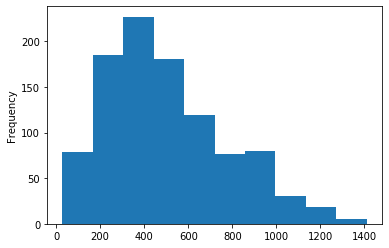

In [54]:
data_df.order_price.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C5410C5C0>,
      dtype=object)

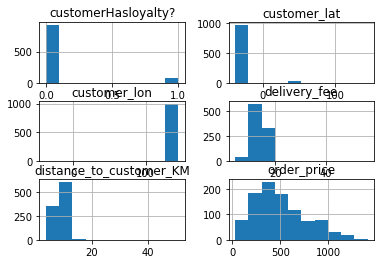

In [51]:
data_df[['order_price','customer_lat','customer_lon','customerHasloyalty?','distance_to_customer_KM','delivery_fee']].hist()

#### Boxplot

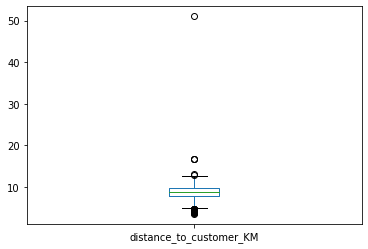

In [64]:
data_df.distance_to_customer_KM.plot.box()

order_price                   AxesSubplot(0.125,0.536818;0.227941x0.343182)
customer_lat               AxesSubplot(0.398529,0.536818;0.227941x0.343182)
customer_lon               AxesSubplot(0.672059,0.536818;0.227941x0.343182)
customerHasloyalty?              AxesSubplot(0.125,0.125;0.227941x0.343182)
distance_to_customer_KM       AxesSubplot(0.398529,0.125;0.227941x0.343182)
delivery_fee                  AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

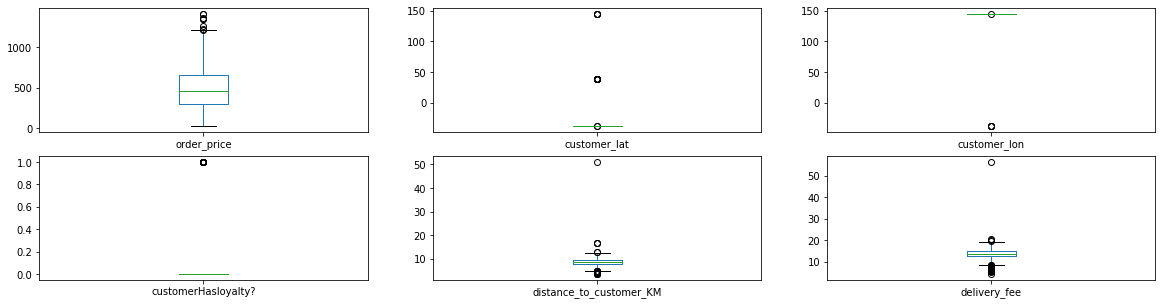

In [70]:
data_df[['order_price','customer_lat','customer_lon','customerHasloyalty?','distance_to_customer_KM','delivery_fee']].plot(kind='box',subplots=True, layout=(2,3), figsize=(20,5))

### Categorical

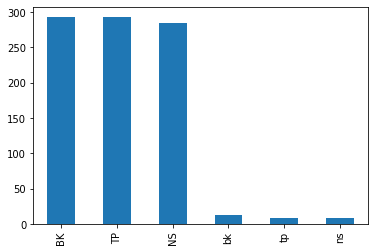

In [53]:
data_df.branch_code.value_counts().plot.bar()

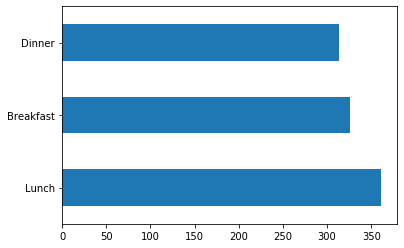

In [56]:
data_df.order_type.value_counts().plot.barh()

## Missing Value
#### Calculation

In [62]:
data_df.isna().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

#### Visualization

In [58]:
import missingno as msno

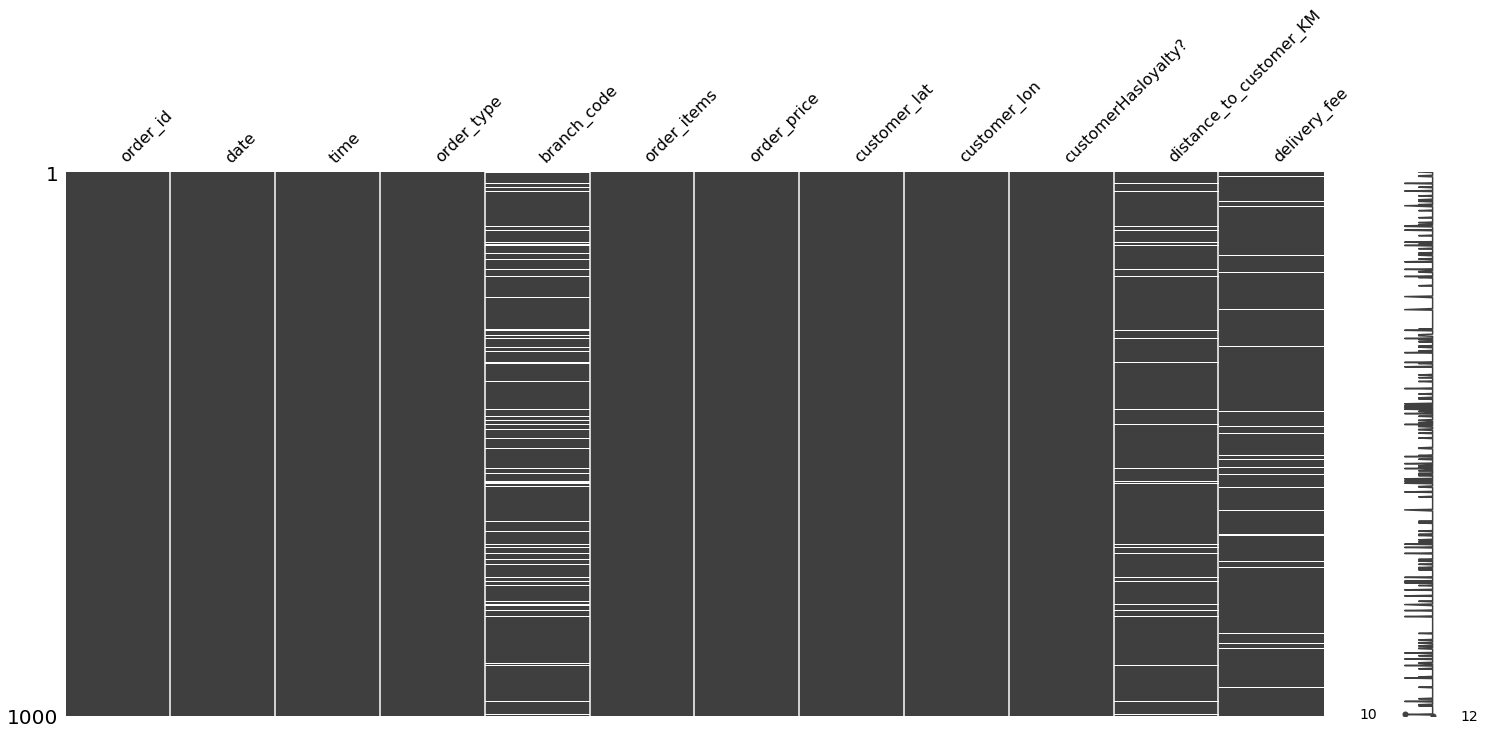

In [59]:
msno.matrix(data_df)